In [250]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [251]:
from google.colab import drive

drive.mount("/content/gdrive")  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [252]:
%cd "/content/gdrive/MyDrive/IA/DataSets/Wine"

/content/gdrive/MyDrive/IA/DataSets/Wine


In [253]:
import pandas as pd

columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df = pd.read_csv('wine.data', names=columns)
df.head()# Open the file and create the data frame

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [254]:
df_corrs = df.corr()["Color intensity"]
df_corrs.sort_values(ascending=False)

Color intensity                 1.000000
Alcohol                         0.546364
Proline                         0.316100
Class                           0.265668
Ash                             0.258887
Malic acid                      0.248985
Magnesium                       0.199950
Nonflavanoid phenols            0.139057
Alcalinity of ash               0.018732
Proanthocyanins                -0.025250
Total phenols                  -0.055136
Flavanoids                     -0.172379
OD280/OD315 of diluted wines   -0.428815
Hue                            -0.521813
Name: Color intensity, dtype: float64

# Modelo inicial

In [255]:
y_df = df['Color intensity']
x_df = df.drop(['Color intensity'], axis=1)

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scipy.stats.mstats import winsorize

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.20)

In [258]:
x_test_ind= x_test.reset_index()
x_train_ind = x_train.reset_index()
y_test_ind = y_test.reset_index()
y_train_ind = y_train.reset_index()

Train

In [259]:
reg = LinearRegression()

In [260]:
reg = reg.fit(x_train.values, y_train.values)

In [261]:
reg.score(x_train.values,y_train.values)

0.7178226272669235

Test

In [262]:
reg.score(x_test.values,y_test.values)

0.6782166861007255

Cross val

In [263]:
abs(cross_val_score(LinearRegression(), x_train.values, y_train.values, cv=10, scoring = "r2").mean())

0.5581811360495255

# Modelo 2

In [264]:
df_corrs = df.corr()["Color intensity"]
df_corrs.sort_values(ascending=False)

Color intensity                 1.000000
Alcohol                         0.546364
Proline                         0.316100
Class                           0.265668
Ash                             0.258887
Malic acid                      0.248985
Magnesium                       0.199950
Nonflavanoid phenols            0.139057
Alcalinity of ash               0.018732
Proanthocyanins                -0.025250
Total phenols                  -0.055136
Flavanoids                     -0.172379
OD280/OD315 of diluted wines   -0.428815
Hue                            -0.521813
Name: Color intensity, dtype: float64

In [265]:
x_train = x_train[["Alcohol","Hue","OD280/OD315 of diluted wines","Proline","Ash", "Malic acid", "Class"]]
x_test = x_test[["Alcohol","Hue","OD280/OD315 of diluted wines","Proline","Ash", "Malic acid", "Class"]]


Train

In [266]:
reg = LinearRegression()

In [267]:
reg = reg.fit(x_train.values, y_train.values)

In [268]:
reg.score(x_train.values,y_train.values)

0.6616694512542707

Test

In [269]:
reg.score(x_test.values,y_test.values)

0.6785156915871222

Cross val

In [270]:
abs(cross_val_score(LinearRegression(), x_train.values, y_train.values, cv=10, scoring = "r2").mean())

0.5172967641534953

# Modelo 3

In [271]:
df_w = df

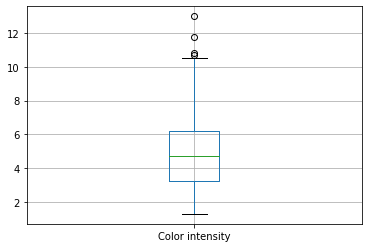

In [272]:
df_w.boxplot(column='Color intensity')

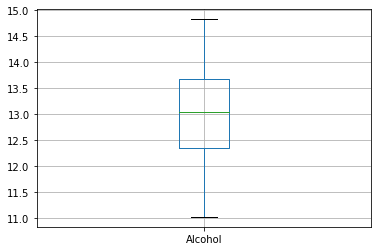

In [273]:
df_w.boxplot(column='Alcohol')

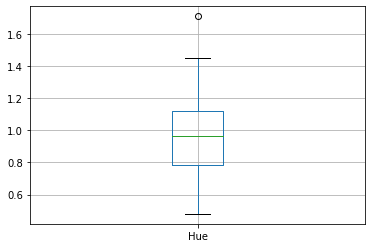

In [274]:
df_w.boxplot(column='Hue')

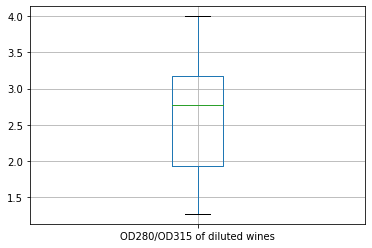

In [275]:
df_w.boxplot(column='OD280/OD315 of diluted wines')

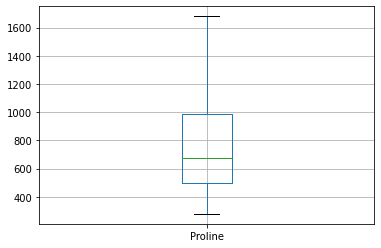

In [276]:
df_w.boxplot(column='Proline')

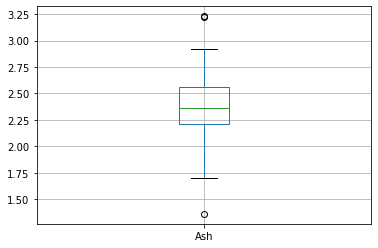

In [277]:
df_w.boxplot(column='Ash')

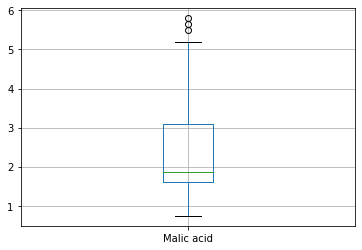

In [278]:
df_w.boxplot(column='Malic acid')

Como se observa, en algunas columnas hay outliyers, asi que procederemos a winzorizar dichos outlayers

In [279]:
df_w["Color intensity"] = winsorize(df_w["Color intensity"], limits=[0, 0.01])
df_w["Hue"] = winsorize(df_w["Hue"], limits=[0, 0.01])
df_w["Ash"] = winsorize(df_w["Ash"], limits=[0.01, 0.02])
df_w["Malic acid"] = winsorize(df_w["Malic acid"], limits=[0, 0.01])

In [280]:
df_w_test = df_w.loc[x_test_ind["index"], :]
df_w_train = df_w.loc[x_train_ind["index"], :]

In [281]:
x_test = df_w_test.drop(['Color intensity'], axis=1)
x_train = df_w_train.drop(['Color intensity'], axis=1)
y_test = df_w_test['Color intensity']
y_train = df_w_train['Color intensity']

Train

In [282]:
reg = LinearRegression()

In [283]:
reg = reg.fit(x_train.values, y_train.values)

In [284]:
reg.score(x_train.values,y_train.values)

0.7220154752522276

Test

In [285]:
reg.score(x_test.values,y_test.values)

0.6674678879819087

Cross val

In [286]:
abs(cross_val_score(LinearRegression(), x_train.values, y_train.values, cv=10, scoring = "r2").mean())

0.5821552131525264

**Coeficientes finales**

In [287]:
reg.coef_

array([ 1.76769905e+00,  1.12860714e+00, -1.12024068e-01,  8.08360447e-01,
       -9.18755339e-02,  2.75727101e-03,  1.32150586e-01,  9.31630513e-01,
        1.11338438e+00,  1.28310513e-01, -3.33673103e+00, -9.33834640e-01,
        2.04163820e-03])

# Modelo 4

In [288]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

In [289]:
df_norm = minmax_norm(df_w)

In [290]:
df_norm_test = df_norm.loc[x_test_ind["index"], :]
df_norm_train = df_norm.loc[x_train_ind["index"], :]

In [291]:
x_test = df_norm_test.drop(['Color intensity'], axis=1)
x_train = df_norm_train.drop(['Color intensity'], axis=1)
y_test = df_norm_test['Color intensity']
y_train = df_norm_train['Color intensity']

Train

In [292]:
reg = LinearRegression()

In [293]:
reg = reg.fit(x_train.values, y_train.values)

In [294]:
reg.score(x_train.values,y_train.values)

0.7220154752522275

Test

In [295]:
reg.score(x_test.values,y_test.values)

0.6674678879818997

Cross val

In [296]:
abs(cross_val_score(LinearRegression(), x_train.values, y_train.values, cv=10, scoring = "r2").mean())

0.5821552131525243